In [66]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  #绘制3D图像所需要的模块

In [67]:
#使用一个二元变量的线性回归，x1，x2为变量，y为标签
data = np.genfromtxt("Delivery.csv", delimiter=",")
print(data)  #前两列为变量，最后一列为y值，即标签值

[[100.    4.    9.3]
 [ 50.    3.    4.8]
 [100.    4.    8.9]
 [100.    2.    6.5]
 [ 50.    2.    4.2]
 [ 80.    2.    6.2]
 [ 75.    3.    7.4]
 [ 65.    4.    6. ]
 [ 90.    3.    7.6]
 [ 90.    2.    6.1]]


In [68]:
#切分数据
x_data = data[:, :-1]
y_data = data[:, -1]
print(x_data)
print(y_data)

[[100.   4.]
 [ 50.   3.]
 [100.   4.]
 [100.   2.]
 [ 50.   2.]
 [ 80.   2.]
 [ 75.   3.]
 [ 65.   4.]
 [ 90.   3.]
 [ 90.   2.]]
[9.3 4.8 8.9 6.5 4.2 6.2 7.4 6.  7.6 6.1]


In [69]:
# 同理先将各个参数进行设定 （该线性函数比较简单，可以表示为：y = w1x1 + w2x2 + b）
#学习率
learn_rate = 0.0001
#参数
w1 = 0
w2 = 0
b = 0
#设置最大迭代次数
epochs = 50


# 最小二乘法(得到总代价)
def least_squares(w1, w2, b, x_data, y_data):
    totalError = 0
    for i in range(0, len(x_data)):
        totalError += (y_data[i] - (w1 * x_data[i, 0] + w2 * x_data[i, 1] + b)) ** 2
    return totalError / float(len(x_data))


# 梯度下降算法
def Gradient_descent(x_data, y_data, w1, w2, b, learn_rate, epochs):
    #样本总量
    m = float(len(x_data))
    for i in range(epochs):
        w1_grad = 0
        w2_grad = 0
        b_grad = 0
        for j in range(0, len(x_data)):
            # 偏导数的正负号根据算式预测输出与真实结果的前后关系决定
            w1_grad += -(1 / m) * x_data[j, 0] * (y_data[j] - (w1 * x_data[j, 0] + w2 * x_data[j, 1] + b))
            w2_grad += -(1 / m) * x_data[j, 1] * (y_data[j] - (w2 * x_data[j, 0] + w2 * x_data[j, 1] + b))
            b_grad += -(1 / m) * (y_data[j] - (w1 * x_data[j, 0] + w2 * x_data[j, 1] + b))
        #同步更新三个参数
        w1 = w1 - (learn_rate * w1_grad)
        w2 = w2 - (learn_rate * w2_grad)
        b = b - (learn_rate * w2_grad)

    return w1, w2, b

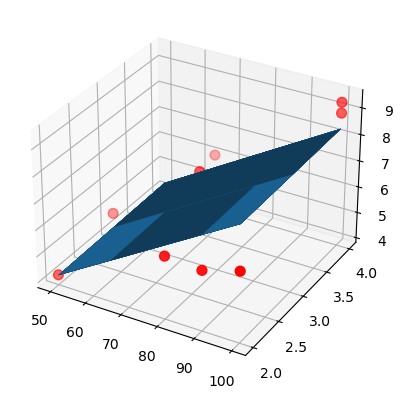

In [70]:
#测试结果
w1, w2, b = Gradient_descent(x_data, y_data, w1, w2, b, learn_rate, epochs)

ax = plt.figure().add_subplot(111, projection='3d')
ax.scatter(x_data[:, 0], x_data[:, 1], y_data,c = 'r', s = 50)
x0 = x_data[:, 0]
x1 = x_data[:, 1]

x0, x1 = np.meshgrid(x0, x1)  #网格矩阵
z = w1 * x0 + w2 * x1 + b
ax.plot_surface(x0, x1, z)
plt.show()